# Random data visualisation and sampling

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 2

In [28]:
# 1000 samples of uniform distribution on interval [0, 1]
a_uni1, b_uni1 = (0, 1)
array1 = np.random.uniform(low=a_uni1, high=b_uni1, size=1000)

# 1000 samples of normal distribution with mean 0 and standard deviation 1
mean2, std2 = (0, 1)
array2 = np.random.normal(loc=mean2, scale=std2, size=1000)

# 1000 samples of normal distribution with mean 0 and standard deviation 10
mean3, std3 = (0, 10)
array3 = np.random.normal(loc=mean3, scale=std3, size=1000)

# 1000 samples of beta distribution for the parameters (1, 1); (2, 2); (3, 9)
a_bet4, b_bet4 = (1, 1)
array4 = np.random.beta(a=a_bet4, b=b_bet4, size=1000)
a_bet5, b_bet5 = (2, 2)
array5 = np.random.beta(a=a_bet5, b=b_bet5, size=1000)
a_bet6, b_bet6 = (3, 9)
array6 = np.random.beta(a=a_bet6, b=b_bet6, size=1000)

# 10000 samples of two-dimensional normal distributions each with mean (0, 0) and covariance matrices
mean7, cov7 = ([0, 0], [[1, 0], [0, 1]])
array7 = np.random.multivariate_normal(mean=mean7, cov=cov7, size=(1, 5000))
mean8, cov8 = ([0, 0], [[2, 1], [1, 2]])
array8 = np.random.multivariate_normal(mean=mean8, cov=cov8, size=(1, 5000))

### Exercise 3

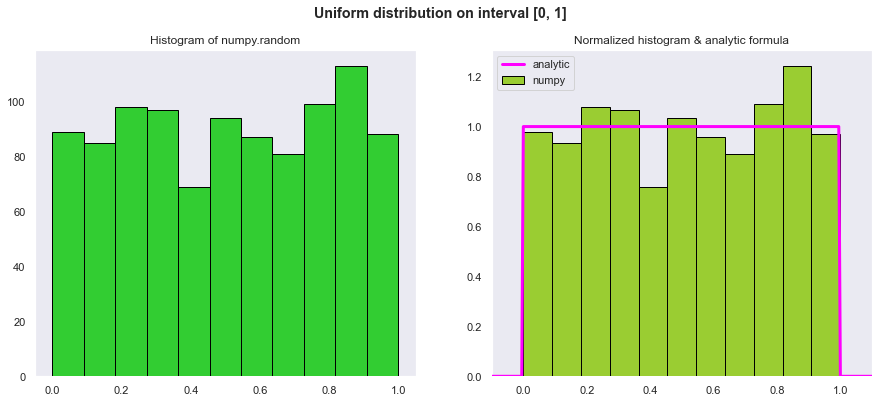

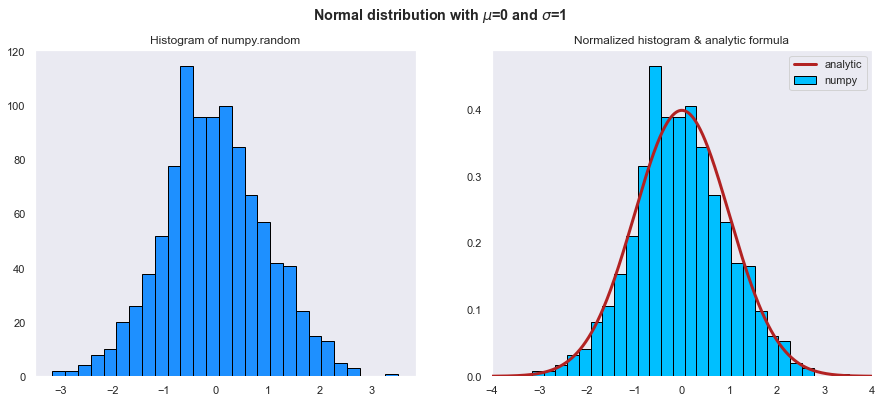

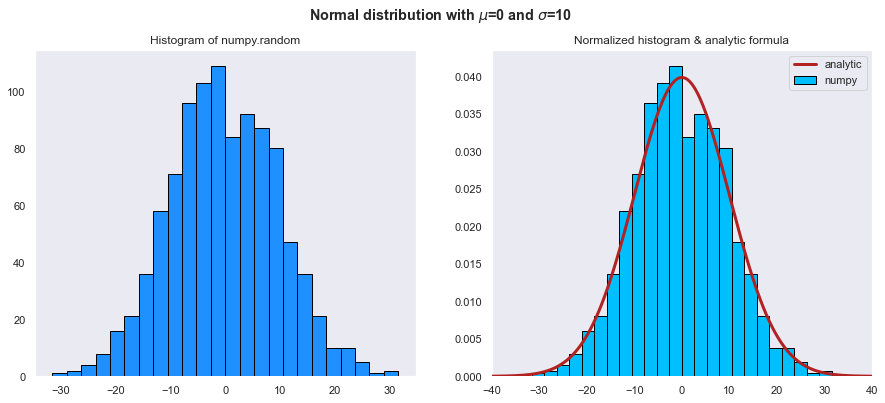

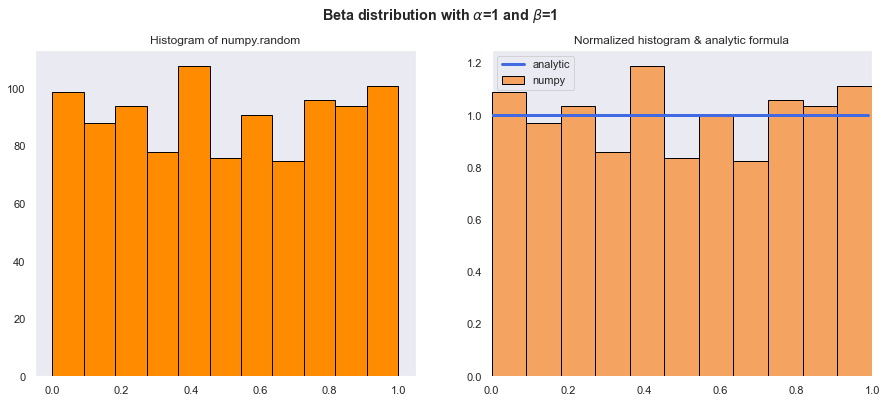

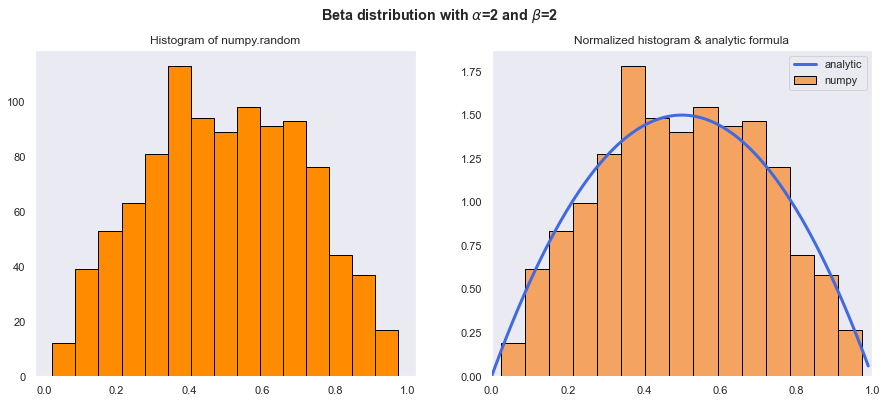

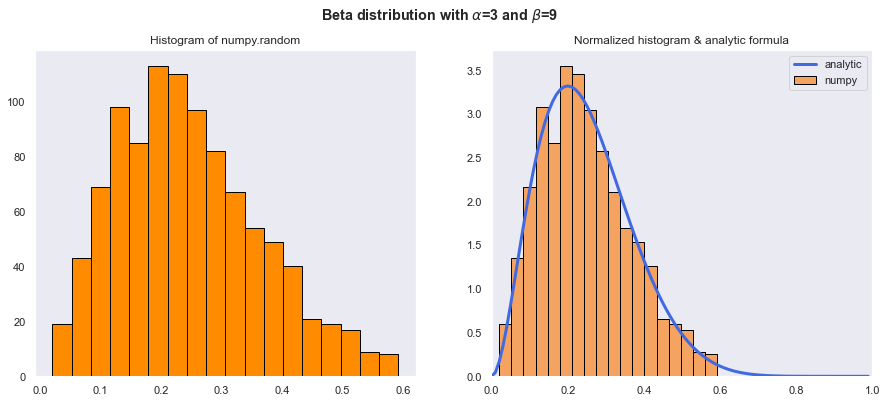

In [29]:
# Plots for one dimensional distributions:

# a) uniform distribution
x_auni = np.arange(-0.1, 1.1, 0.005)
y_auni = [(1/(b_uni1-a_uni1) if a_uni1 <= x <= b_uni1 else 0) for x in x_auni]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Uniform distribution on interval [0, 1]', fontweight="bold")

ax0.hist(array1, bins='auto', color='limegreen', edgecolor="black", zorder=3)
ax0.set_title("Histogram of numpy.random")
ax0.grid(zorder=0)

ax1.hist(array1, bins='auto', density=True, color='yellowgreen', edgecolor="black", zorder=3, label="numpy")
ax1.plot(x_auni, y_auni, zorder=3, color='fuchsia', linewidth=3, label="analytic")
ax1.set_title("Normalized histogram & analytic formula")
ax1.grid(zorder=0)
ax1.set_xlim(a_uni1-0.1, b_uni1+0.1)
ax1.legend()
plt.show()


# b) normal distribution
for mean, std, random_array in [(mean2, std2, array2), (mean3, std3, array3)]:
    x_anorm = np.arange(mean-4*std, mean+4*std, 0.01)
    y_anorm = [1/(std*np.sqrt(2*np.pi))*np.exp(-0.5*np.power((x-mean)/std, 2)) for x in x_anorm]

    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.suptitle(r'Normal distribution with $\mu$={} and $\sigma$={}'.format(mean, std), fontweight="bold")

    ax0.hist(random_array, bins='auto', color='dodgerblue', edgecolor="black", zorder=3)
    ax0.set_title("Histogram of numpy.random")
    ax0.grid(zorder=0)

    ax1.hist(random_array, bins='auto', density=True, color='deepskyblue', edgecolor="black", zorder=3, label="numpy")
    ax1.plot(x_anorm, y_anorm, zorder=3, color='firebrick', linewidth=3, label="analytic")
    ax1.set_title("Normalized histogram & analytic formula")
    ax1.grid(zorder=0)
    ax1.set_xlim(mean-4*std, mean+4*std)
    ax1.legend()
    plt.show()


# c) beta distribution
for alpha, beta, random_array in [(a_bet4, b_bet4, array4), (a_bet5, b_bet5, array5), (a_bet6, b_bet6, array6)]:
    x_abet = np.arange(0, 1, 0.01)
    gamma_const = math.gamma(alpha+beta)/(math.gamma(alpha)*math.gamma(beta))
    y_abet = [gamma_const*np.power(x, alpha-1)*np.power(1-x, beta-1) for x in x_abet]

    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.suptitle(r'Beta distribution with $\alpha$={} and $\beta$={}'.format(alpha, beta), fontweight="bold")

    ax0.hist(random_array, bins='auto', color='darkorange', edgecolor="black", zorder=3)
    ax0.set_title("Histogram of numpy.random")
    ax0.grid(zorder=0)

    ax1.hist(random_array, bins='auto', density=True, color='sandybrown', edgecolor="black", zorder=3, label="numpy")
    ax1.plot(x_abet, y_abet, zorder=3, color='royalblue', linewidth=3, label="analytic")
    ax1.set_title("Normalized histogram & analytic formula")
    ax1.grid(zorder=0)
    ax1.set_xlim(0, 1)
    ax1.legend()
    plt.show()

### Exercise 4

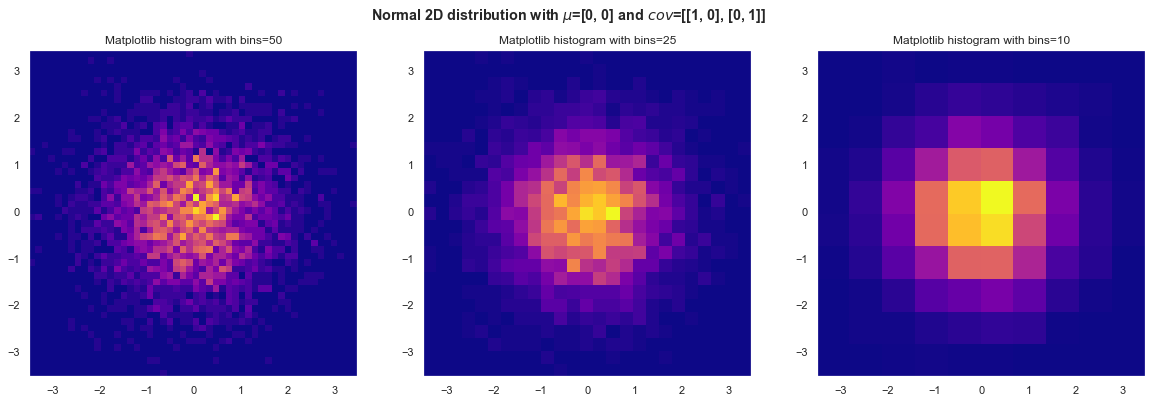

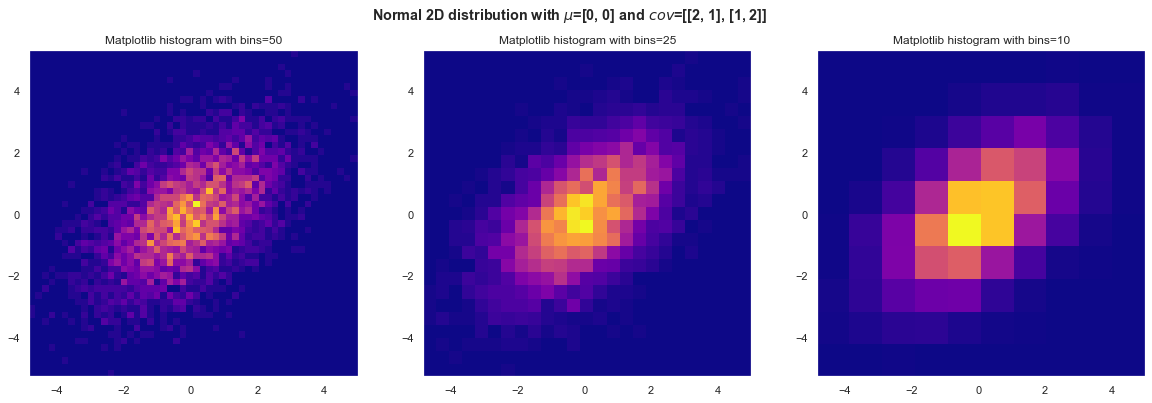

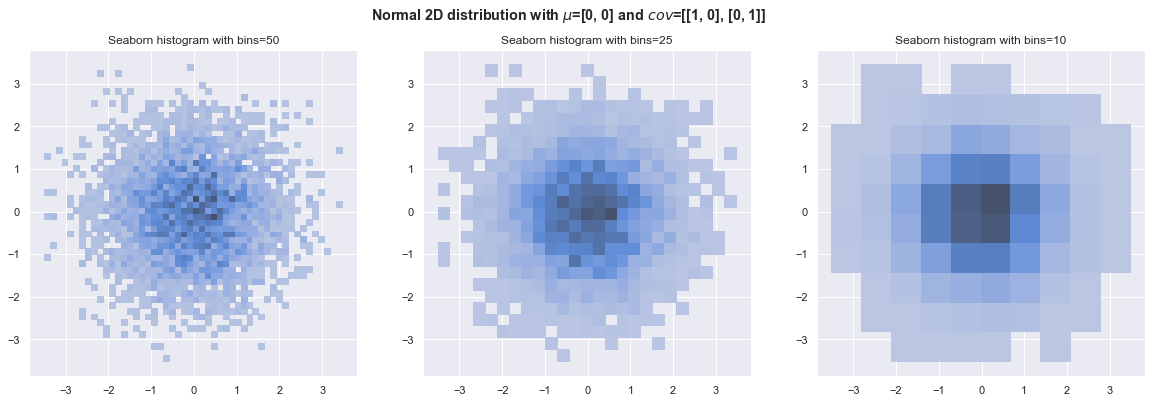

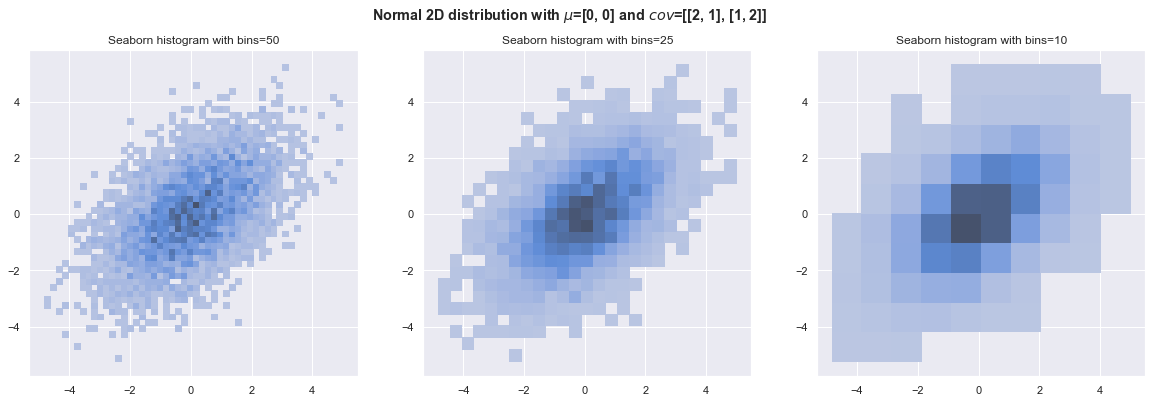

In [30]:
# Plots for two dimensional distributions:

# a) Matplotlib normal distribution
for mean, cov, random_array in [(mean7, cov7, array7), (mean8, cov8, array8)]:
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.suptitle(r'Normal 2D distribution with $\mu$={} and $cov$={}'.format(mean, cov), fontweight="bold")

    ax0.hist2d(x=random_array[0,:,0], y=random_array[0,:,1], cmap='plasma', bins=50)
    ax0.set_title("Matplotlib histogram with bins=50")

    ax1.hist2d(x=random_array[0,:,0], y=random_array[0,:,1], cmap='plasma', bins=25)
    ax1.set_title("Matplotlib histogram with bins=25")

    ax2.hist2d(x=random_array[0,:,0], y=random_array[0,:,1], cmap='plasma', bins=10)
    ax2.set_title("Matplotlib histogram with bins=10")
    plt.show()


# b) Seaborn normal distribution
for mean, cov, random_array in [(mean7, cov7, array7), (mean8, cov8, array8)]:
    x = random_array[0,:,0]
    y = random_array[0,:,1]
    sns.set()  # set seaborn plotting aesthetics as default

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    fig.suptitle(r'Normal 2D distribution with $\mu$={} and $cov$={}'.format(mean, cov), fontweight="bold")

    sns.histplot(x=x, y=y, bins=50, ax=ax0)
    ax0.set_title("Seaborn histogram with bins=50")

    sns.histplot(x=x, y=y, bins=25, ax=ax1)
    ax1.set_title("Seaborn histogram with bins=25")

    sns.histplot(x=x, y=y, bins=10, ax=ax2)
    ax2.set_title("Seaborn histogram with bins=10")
    plt.show()

### Exercise 5

In [47]:
x_list = []
y_list = []
alpha_list = []
beta_list = []

for _ in range(1000):
    alpha = np.random.normal(loc=2, scale=0.1, size=1)
    alpha_list.append(alpha)
    beta = np.random.normal(loc=0.2, scale=0.2, size=1)
    beta_list.append(beta)
    x = np.random.normal(loc=0, scale=3, size=1)
    x_list.append(x)
    sigma = np.abs(np.random.normal(0, 1))
    mu = alpha + beta * x
    y_list.append(*np.random.normal(loc=mu, scale=sigma, size=1))

### Exercise 6

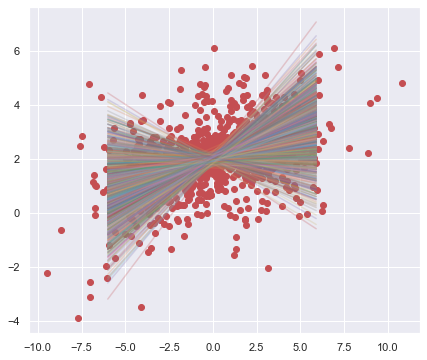

In [53]:
fig, ax0 = plt.subplots(figsize=(7, 6))
ax0.scatter(x_list, y_list, color='r')
x = np.arange(-6, 6, 0.1)
for alpha, beta in zip(alpha_list, beta_list):
    y = alpha + beta * x
    ax0.plot(x, y, alpha=0.25)
plt.show()